In [7]:
# Checking the environment
import sys
import cv2
import numpy as np

print("Python version : {0} ".format(sys.version))
print("OpenCV version : {0} ".format(cv2.__version__))
print("Numpy version  : {0}".format(np.__version__))


Python version : 3.6.1 (default, Apr  4 2017, 09:40:21) 
[GCC 4.2.1 Compatible Apple LLVM 8.1.0 (clang-802.0.38)] 
OpenCV version : 3.2.0-dev 
Numpy version  : 1.12.1


<IPython.core.display.Javascript object>


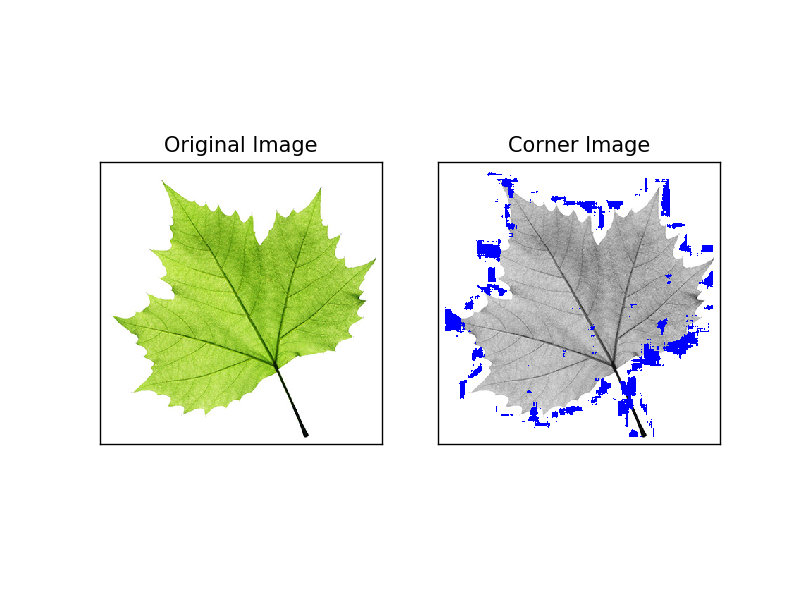

In [53]:
# Implementing Harris Corner Detection from Scratch

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

def findCorners(img, window_size=5, k=0.04, thresh=10000):
    """
    Finds and returns list of corners and new image with corners drawn
    :param img: The original image
    :param window_size: The size (side length) of the sliding window
    :param k: Harris corner constant. Usually 0.04 - 0.06
    :param thresh: The threshold above which a corner is counted
    :return:
    """
    
    #Find x and y derivatives
    dy, dx = np.gradient(img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    height = img.shape[0]
    width = img.shape[1]
    
    newImg = img.copy()
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
    offset = int(window_size/2)

    #Loop through image and find our corners
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            #Calculate sum of squares
            windowIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            #Find determinant and trace, use to get corner response
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            R = det - k*(trace**2)

            #If corner response is over threshold, color the point
            if R > thresh:
                color_img.itemset((y, x, 0), 0)
                color_img.itemset((y, x, 1), 0)
                color_img.itemset((y, x, 2), 255)
    return color_img

IMG = os.path.join("resources","images","leaf.jpg")

img = mpimg.imread(IMG)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

res = findCorners(gray, 20, 0.2, 10000)

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(res)

plt.show()



<IPython.core.display.Javascript object>


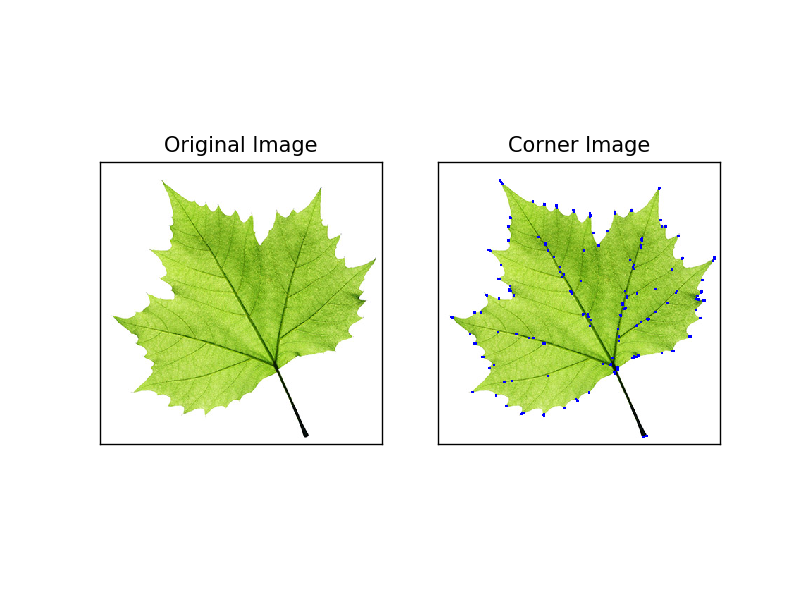

In [21]:
# Harris Corner Detection using OpenCV
# using cv2.cornerHarris()  

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
copy[dst>0.01*dst.max()]=[0,0,255]

plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()



<IPython.core.display.Javascript object>


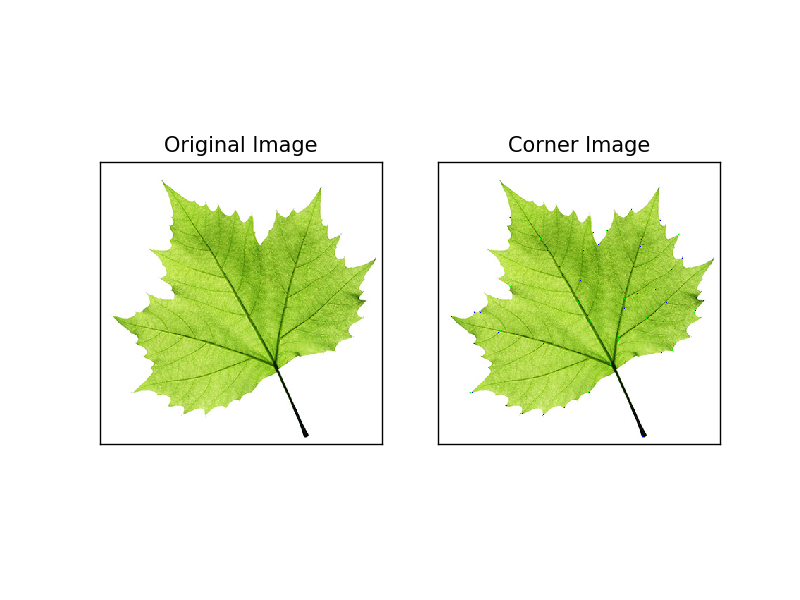

In [24]:
# Harris Corner Detection using OpenCV
# using cv2.cornerSubPix()  & cv2.connectedComponentsWithStats

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
# the blue points are really small use cv2.circle to make them visible
res = np.hstack((centroids,corners))
res = np.int0(res)
copy[res[:,1],res[:,0]]=[0,0,255]
copy[res[:,3],res[:,2]] = [0,255,0]



plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

<IPython.core.display.Javascript object>


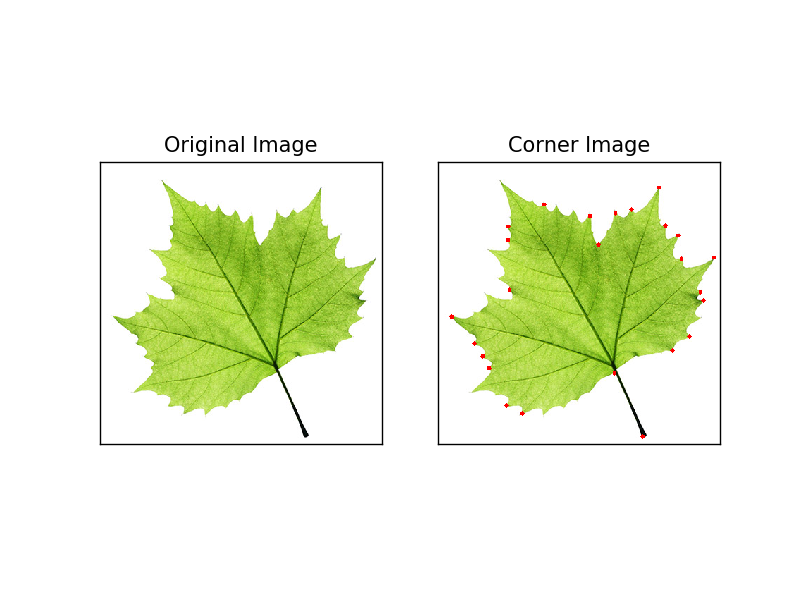

In [19]:
# Corner Detection using Harris-Shi-Tomasi Feature Detector 

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib notebook

IMG = os.path.join("resources","images","leaf.jpg")
img = mpimg.imread(IMG)
copy = img.copy()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(copy,(x,y),3,255,-1)

plt.figure("Harri-Shi-Tomasi Feature Detector")


plt.subplot(121)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])
plt.imshow(img)

plt.subplot(122)
plt.title("Corner Image")
plt.xticks([]), plt.yticks([])
plt.imshow(copy)

plt.show()

